In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [27]:
data = pd.read_excel('optdigits-tra.xlsx',header = None) #不放置列索引
X = data.iloc[:,:64].to_numpy()
y = data.iloc[:,64].to_numpy()

# 数据归一化：将特征缩放到标准正态分布
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 重塑数据为图像格式
X_scaled = X_scaled.reshape(-1, 8, 8, 1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [28]:
# 非书写者
# 加载数据
data_outer = pd.read_excel('optdigits-tes.xlsx')  

# 提取特征和标签
X_test_outer = data_outer.iloc[:, :64].to_numpy()  
y_test_outer = data_outer.iloc[:, 64].to_numpy()   

# 数据归一化：将特征缩放到标准正态分布
X_scaled_outer = scaler.transform(X_test_outer)

# 重塑数据为图像格式
X_scaled_outer = X_scaled_outer.reshape(-1, 8, 8, 1)

#### 书写者

In [33]:
# 创建CNN模型
model = models.Sequential()

# 第一层卷积
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))

# 第二层卷积
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 使用GlobalAveragePooling2D代替MaxPooling2D
model.add(layers.GlobalAveragePooling2D())

# 全连接层
model.add(layers.Dense(256, activation='relu'))

# 输出层
model.add(layers.Dense(10, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


e:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# 书写者
# 训练模型
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"测试集准确率: {accuracy:.3f}")


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2892 - loss: 1.9887 - val_accuracy: 0.7176 - val_loss: 0.8841
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7626 - loss: 0.7593 - val_accuracy: 0.8680 - val_loss: 0.4507
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8905 - loss: 0.3961 - val_accuracy: 0.8967 - val_loss: 0.3533
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9162 - loss: 0.2867 - val_accuracy: 0.9281 - val_loss: 0.2234
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9461 - loss: 0.1950 - val_accuracy: 0.9386 - val_loss: 0.1863
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9495 - loss: 0.1801 - val_accuracy: 0.9464 - val_loss: 0.1796
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9556 - loss: 0.1491 - val_accuracy: 0.9582 - val_loss: 0.1628
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9668 - loss: 0.1210 - val_accuracy: 0.9595 - val_loss:

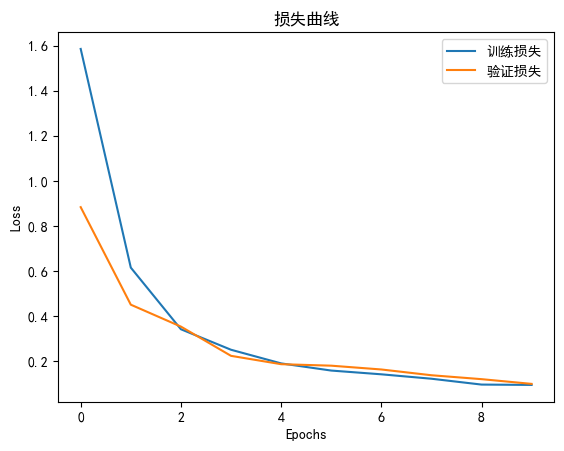

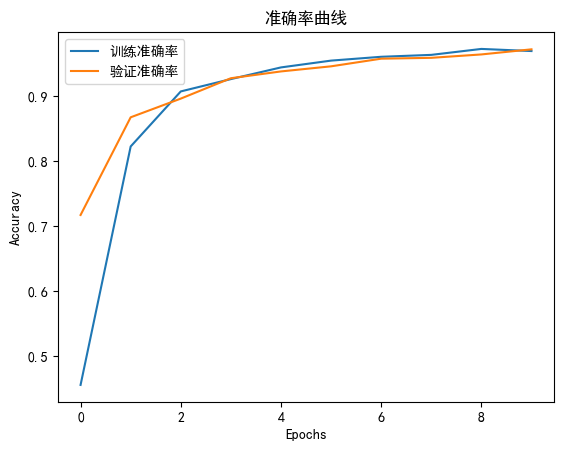

In [35]:

# 绘制损失和准确率曲线
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('损失曲线')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('准确率曲线')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

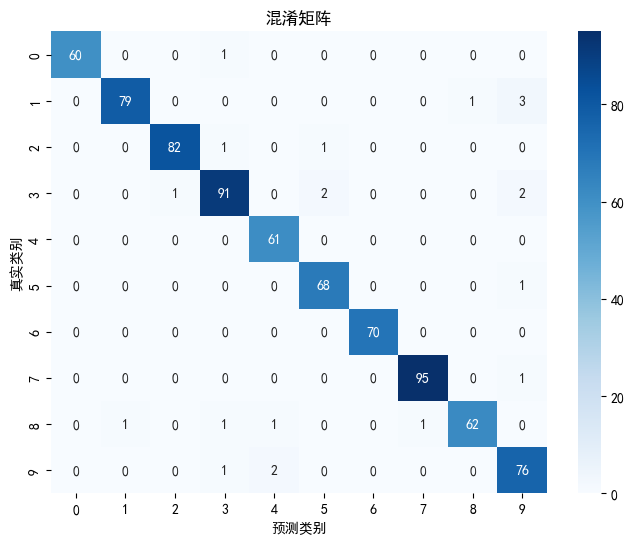

In [36]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred_classes)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('混淆矩阵')
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.show()

#### 非书写者

In [37]:
# 创建CNN模型
model = models.Sequential()

# 第一层卷积
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))

# 第二层卷积
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 使用GlobalAveragePooling2D代替MaxPooling2D
model.add(layers.GlobalAveragePooling2D())

# 全连接层
model.add(layers.Dense(256, activation='relu'))

# 输出层
model.add(layers.Dense(10, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


e:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# 非书写者
# 训练模型
present = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_scaled_outer, y_test_outer))

# 在测试集上进行预测
y_pred_outer = model.predict(X_scaled_outer)
y_pred_classes = np.argmax(y_pred_outer, axis=1)

# 计算准确率
accuracy = accuracy_score(y_test_outer, y_pred_classes)
print(f"测试集准确率: {accuracy:.3f}")

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3092 - loss: 1.9853 - val_accuracy: 0.7233 - val_loss: 0.9075
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8126 - loss: 0.6474 - val_accuracy: 0.8580 - val_loss: 0.4930
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9075 - loss: 0.3314 - val_accuracy: 0.8942 - val_loss: 0.3233
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9316 - loss: 0.2428 - val_accuracy: 0.9159 - val_loss: 0.2788
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9469 - loss: 0.1805 - val_accuracy: 0.9321 - val_loss: 0.2153
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9492 - loss: 0.1644 - val_accuracy: 0.9287 - val_loss: 0.2160
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9656 - loss: 0.1085 - val_accuracy: 0.9449 - val_loss: 0.1859
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9719 - loss: 0.0913 - val_accuracy: 0.9471 - val_loss:

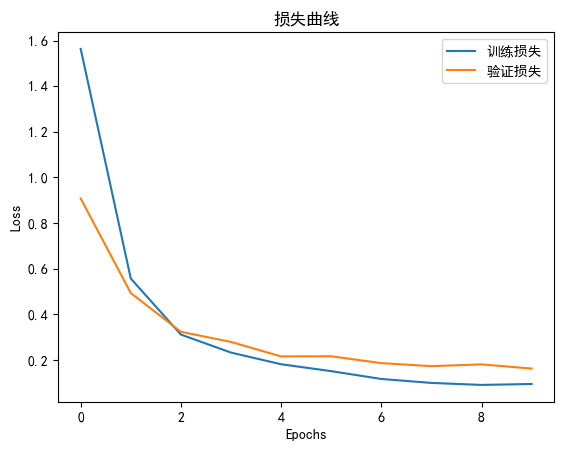

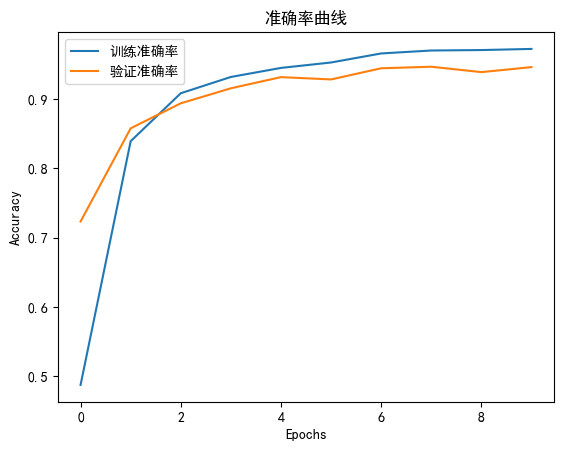

In [39]:
# 绘制损失和准确率曲线
plt.plot(present.history['loss'], label='训练损失')
plt.plot(present.history['val_loss'], label='验证损失')
plt.title('损失曲线')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(present.history['accuracy'], label='训练准确率')
plt.plot(present.history['val_accuracy'], label='验证准确率')
plt.title('准确率曲线')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

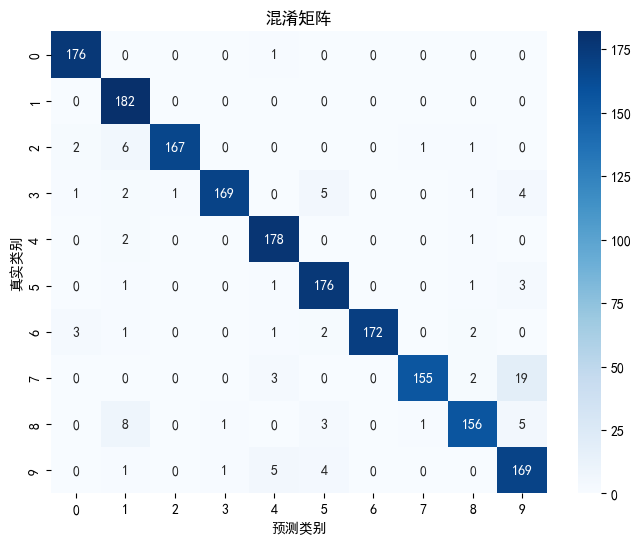

In [40]:
# 计算混淆矩阵
cm = confusion_matrix(y_test_outer, y_pred_classes)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('混淆矩阵')
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.show()